This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=2024)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
30/30 [==============================] - 13s 45ms/step - loss: 1.0366 - accuracy: 0.6862
Epoch 2/5
30/30 [==============================] - 1s 28ms/step - loss: 0.3531 - accuracy: 0.8923
Epoch 3/5
30/30 [==============================] - 1s 28ms/step - loss: 0.2280 - accuracy: 0.9312
Epoch 4/5
30/30 [==============================] - 1s 27ms/step - loss: 0.1595 - accuracy: 0.9511
Epoch 5/5
30/30 [==============================] - 1s 27ms/step - loss: 0.1218 - accuracy: 0.9621


**Evaluating the convnet**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1014 - accuracy: 0.9683
Test accuracy: 0.968


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

**Copying images to training, validation, and test directories**

In [ ]:
#import os, shutil, pathlib

#original_dir = pathlib.Path("train")
#new_base_dir = pathlib.Path("cats_vs_dogs_small")
#def make_subset(subset_name, start_index, end_index):
#    for category in ("cat", "dog"):
#        dir = new_base_dir / subset_name / category
#        os.makedirs(dir)
#        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
#        for fname in fnames:
#            shutil.copyfile(src=original_dir / fname,
#                            dst=dir / fname)

#make_subset("train", start_index=0, end_index=1000)
#make_subset("validation", start_index=1000, end_index=1500)
#make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_base_dir = '/content/drive/My Drive/datasets/cats_and_dogs_small'

**Using `image_dataset_from_directory` to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir +"/train",
    image_size=(180, 180),
    batch_size=256)
validation_dataset = image_dataset_from_directory(
    new_base_dir + "/validation",
    image_size=(180, 180),
    batch_size=256)
test_dataset = image_dataset_from_directory(
    new_base_dir +"/test",
    image_size=(180, 180),
    batch_size=256)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (256, 180, 180, 3)
labels batch shape: (256,)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
8/8 [==============================] - 125s 17s/step - loss: 1.4060 - accuracy: 0.4855 - val_loss: 0.6931 - val_accuracy: 0.5010
Epoch 2/30
8/8 [==============================] - 8s 635ms/step - loss: 0.6921 - accuracy: 0.5085 - val_loss: 0.6895 - val_accuracy: 0.5360
Epoch 3/30
8/8 [==============================] - 8s 626ms/step - loss: 0.7008 - accuracy: 0.5215 - val_loss: 0.6904 - val_accuracy: 0.5160
Epoch 4/30
8/8 [==============================] - 8s 634ms/step - loss: 0.6848 - accuracy: 0.5525 - val_loss: 0.6686 - val_accuracy: 0.5690
Epoch 5/30
8/8 [==============================] - 8s 629ms/step - loss: 0.7021 - accuracy: 0.5610 - val_loss: 0.6819 - val_accuracy: 0.5670
Epoch 6/30
8/8 [==============================] - 8s 639ms/step - loss: 0.6744 - accuracy: 0.5620 - val_loss: 0.7761 - val_accuracy: 0.5160
Epoch 7/30
8/8 [==============================] - 9s 635ms/step - loss: 1.0774 - accuracy: 0.5465 - val_loss: 0.6755 - val_accuracy: 0.6240
Epoch 8/30
8/8 [====

**Fitting the model using a `Dataset`**

**Displaying curves of loss and accuracy during training**

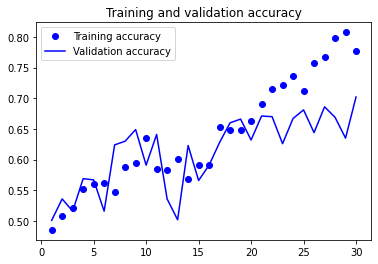

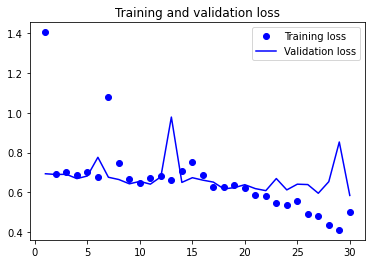

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 107s 143ms/step - loss: 0.6017 - accuracy: 0.6960
Test accuracy: 0.696


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - 10s 656ms/step - loss: 0.7378 - accuracy: 0.4935 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 8s 649ms/step - loss: 0.6919 - accuracy: 0.5225 - val_loss: 0.6877 - val_accuracy: 0.5730
Epoch 3/100
8/8 [==============================] - 8s 644ms/step - loss: 0.6939 - accuracy: 0.5405 - val_loss: 0.6852 - val_accuracy: 0.6320
Epoch 4/100
8/8 [==============================] - 8s 641ms/step - loss: 0.7066 - accuracy: 0.5440 - val_loss: 0.6784 - val_accuracy: 0.6030
Epoch 5/100
8/8 [==============================] - 8s 633ms/step - loss: 0.6917 - accuracy: 0.5480 - val_loss: 0.6818 - val_accuracy: 0.5710
Epoch 6/100
8/8 [==============================] - 8s 641ms/step - loss: 0.6770 - accuracy: 0.5720 - val_loss: 0.6660 - val_accuracy: 0.5710
Epoch 7/100
8/8 [==============================] - 8s 636ms/step - loss: 0.6780 - accuracy: 0.5965 - val_loss: 0.6483 - val_accuracy: 0.6270
Epoch 8/100


**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 2s 141ms/step - loss: 0.5181 - accuracy: 0.7820
Test accuracy: 0.782


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

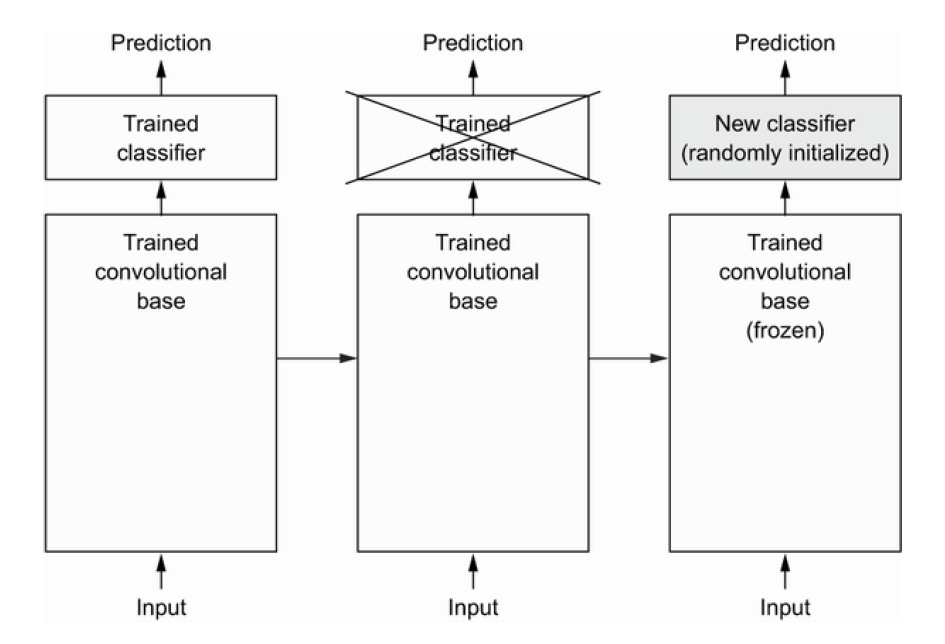

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 16.9105 - accuracy: 0.9280 - val_loss: 3.5828 - val_accuracy: 0.9690
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 4.0501 - accuracy: 0.9715 - val_loss: 4.0257 - val_accuracy: 0.9770
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 2.4101 - accuracy: 0.9840 - val_loss: 3.8040 - val_accuracy: 0.9740
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0653 - accuracy: 0.9895 - val_loss: 4.3199 - val_accuracy: 0.9750
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0575 - accuracy: 0.9910 - val_loss: 3.4016 - val_accuracy: 0.9760
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.4522 - accuracy: 0.9940 - val_loss: 3.5992 - val_accuracy: 0.9770
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.3342 - accuracy: 0.9975 - val_loss: 8.7355 - val_accuracy: 0.9640
Epoch 8/20
63/63 [=

**Plotting the results**

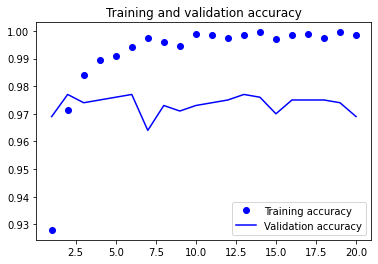

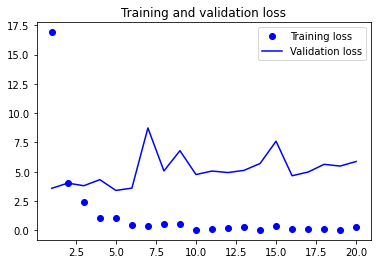

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
8/8 [==============================] - 64s 6s/step - loss: 91.6298 - accuracy: 0.7750 - val_loss: 2.3708 - val_accuracy: 0.9740
Epoch 2/50
8/8 [==============================] - 16s 2s/step - loss: 3.5671 - accuracy: 0.9605 - val_loss: 1.4227 - val_accuracy: 0.9830
Epoch 3/50
8/8 [==============================] - 16s 2s/step - loss: 7.7445 - accuracy: 0.9280 - val_loss: 92.8597 - val_accuracy: 0.7350
Epoch 4/50
8/8 [==============================] - 16s 2s/step - loss: 26.0985 - accuracy: 0.8895 - val_loss: 2.7071 - val_accuracy: 0.9820
Epoch 5/50
8/8 [==============================] - 16s 2s/step - loss: 2.8410 - accuracy: 0.9690 - val_loss: 2.2794 - val_accuracy: 0.9800
Epoch 6/50
8/8 [==============================] - 16s 2s/step - loss: 1.8973 - accuracy: 0.9740 - val_loss: 2.0717 - val_accuracy: 0.9810
Epoch 7/50
8/8 [==============================] - 16s 2s/step - loss: 15.6082 - accuracy: 0.8990 - val_loss: 7.8937 - val_accuracy: 0.9590
Epoch 8/50
8/8 [==============

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 5s 891ms/step - loss: 2.6262 - accuracy: 0.9730
Test accuracy: 0.973


### Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
8/8 [==============================] - 20s 2s/step - loss: 0.3781 - accuracy: 0.9915 - val_loss: 1.5247 - val_accuracy: 0.9830
Epoch 2/30
8/8 [==============================] - 18s 2s/step - loss: 0.2182 - accuracy: 0.9955 - val_loss: 1.5562 - val_accuracy: 0.9800
Epoch 3/30
8/8 [==============================] - 17s 2s/step - loss: 0.2731 - accuracy: 0.9925 - val_loss: 2.0238 - val_accuracy: 0.9830
Epoch 4/30
8/8 [==============================] - 17s 2s/step - loss: 0.0551 - accuracy: 0.9960 - val_loss: 1.9239 - val_accuracy: 0.9830
Epoch 5/30
8/8 [==============================] - 17s 2s/step - loss: 0.2878 - accuracy: 0.9920 - val_loss: 2.0049 - val_accuracy: 0.9820
Epoch 6/30
8/8 [==============================] - 17s 2s/step - loss: 0.2885 - accuracy: 0.9940 - val_loss: 1.8386 - val_accuracy: 0.9820
Epoch 7/30
8/8 [==============================] - 17s 2s/step - loss: 0.1137 - accuracy: 0.9960 - val_loss: 1.8267 - val_accuracy: 0.9810
Epoch 8/30
8/8 [==================

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

4/4 [==============================] - 5s 888ms/step - loss: 2.0943 - accuracy: 0.9760
Test accuracy: 0.976


## Summary